## Q) 최고의 타자는?

1. 타율이 높은 선수?
2. 출루율이 높은 선수?
3. 장타율이 높은 선수?
4. OPS이 높은 선수?

### 데이터 로드

In [1]:
import pandas as pd

In [2]:
file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding='cp949')
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

실제 분석에 사용할 column들로 데이터프레임을 줄입니다.

In [4]:
print(raw.columns)

pruned_columns = ['팀', '이름', '생일', '일자', '상대', '타수', '안타', '홈런', '루타',\
                  '타점', '볼넷', '사구', '희비']
data = raw[pruned_columns]
data.head()

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')


,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


### 선수별 기록 집계

In [5]:
data_player = data.pivot_table(index = ['팀', '이름', '생일'], values = ['타수', '안타', '홈런', '루타',\
                  '타점', '볼넷', '사구', '희비'], aggfunc = 'sum')
data_player.head()

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2

타수가 0인 데이터는 경기에 한번도 나오지 않은 선수이기 때문에 너무 적은 타수를 가진 선수들은 공평한 비교를 위해 제외하도록 합니다.<br>
따라서 히스토그램을 사용해서 타수의 분포를 살펴봅니다.

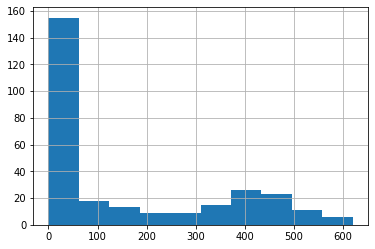

In [6]:
data_player['타수'].hist()

타수가 50보다 큰 선수들만 선택합니다. 그리고 멀티인덱스로 되어 있는 경우 데이터 분석이 어려울 수 있기 때문에 reset_index()를 사용합니다.

In [7]:
condition = data_player['타수'] > 50
data_player[condition]

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
    류승현 1997-07-01   48   9   4   38  150  14   0   0
    박찬호 1995-06-05  160  26   4  131  504  49   2   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  정은원 2000-01-17  211  48   0  148  564  57   8   6
    지성준 1994-04-10   38   5   0   26  104  11   2   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[137 rows x 8 columns]

In [8]:
data_player = data_player[condition].reset_index()
data_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


타율/출루율/장타율/OPS 지표를 만들어보도록 합니다.

In [9]:
def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS']  = df['출루율'] + df['장타율']
    return df

In [10]:
data_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


In [11]:
player_stats = cal_hit(data_player)
player_stats.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.398496,0.370558,0.769055
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.356522,0.373887,0.730409
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.343284,0.364341,0.707625
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.331169,0.320000,0.651169
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.315686,0.317460,0.633147


출루율/장타율/OPS 기준으로 정렬합니다.

In [12]:
player_stats = player_stats.sort_values(by = ['출루율','장타율','OPS'], ascending= False)
player_stats = player_stats.reset_index(drop = True)
player_stats.head(20)


,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758
5,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.461066,0.514831,0.975896
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,3,0.263736,0.456464,0.472527,0.928992
7,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
8,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.452504,0.521127,0.973631
9,두산,김재호,1985-03-21,139,69,8,105,385,51,4,11,0.272727,0.450495,0.361039,0.811534


팀별 선수 출루율 분포를 boxplot을 이용해 살펴보겠습니다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50880 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from c

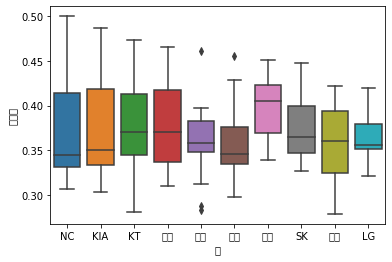

In [13]:
import seaborn as sns

#한글을 지원하지 않음
sns.boxplot(data = player_stats,x='팀',y='출루율')

한글 코드를 지원하도록 수정하는 코드입니다.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

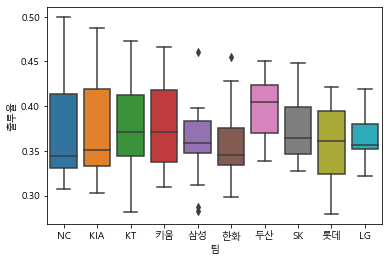

In [15]:
import seaborn as sns
  
sns.boxplot(data = player_stats,x='팀',y='출루율')

팀별 선수 출루율 분포를 swarmplot과 boxplot을 이용해 살펴본다.

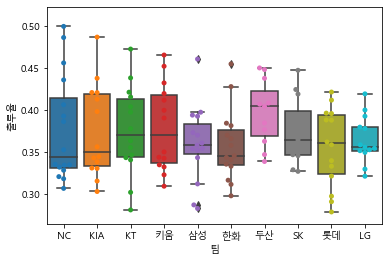

In [16]:
sns.swarmplot(data=player_stats,x='팀',y='출루율')
sns.boxplot(data=player_stats,x='팀',y='출루율')

둘이 같이 사용할 경우 색상이 겹쳐 시각적으로 구분하기 어렵기 때문에 박스플롯을 깔끔하게 정리해 본다.

최소, 최댓값 제거

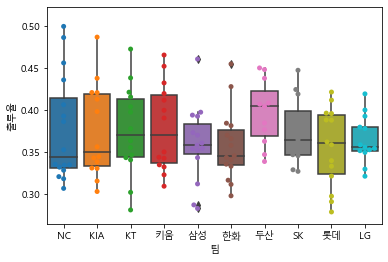

In [17]:
sns.swarmplot(data=player_stats,x='팀',y='출루율')
sns.boxplot(data=player_stats,x='팀',y='출루율',
           showcaps = False)

선 제거

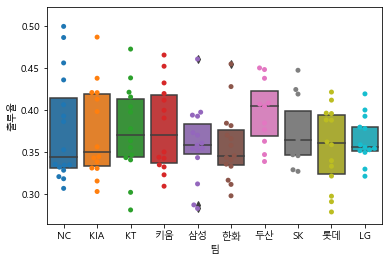

In [18]:
sns.swarmplot(data=player_stats,x='팀',y='출루율')
sns.boxplot(data=player_stats,x='팀',y='출루율',
           showcaps = False, whiskerprops={'linewidth':0},)

이상치 제거

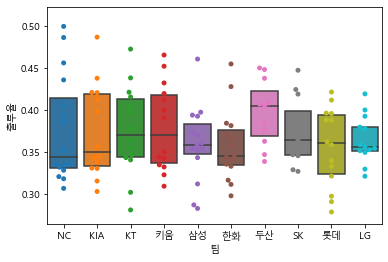

In [19]:
sns.swarmplot(data=player_stats,x='팀',y='출루율')
sns.boxplot(data=player_stats,x='팀',y='출루율',
           showcaps = False, whiskerprops={'linewidth':0},
           showfliers = False,)

박스 색상 제거

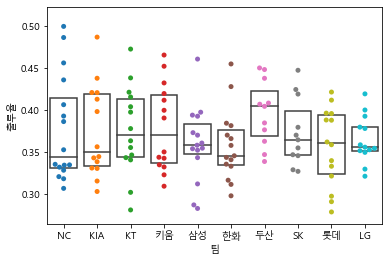

In [20]:
sns.swarmplot(data=player_stats,x='팀',y='출루율')
sns.boxplot(data=player_stats,x='팀',y='출루율',
           showcaps = False, whiskerprops={'linewidth':0},
           showfliers = False,boxprops={'facecolor':'None'})

In [21]:
file = './data/player_stats.csv'

player_stats.to_csv(file, encoding='cp949', index=False)